<img src="../../img/imagen_notebook.webp" width="1200" height="350"/>


## Introducción

------

## Problema de negocio

El síndrome metabólico es un conjunto de condiciones médicas que aumentan el riesgo de enfermedades cardiovasculares, diabetes tipo 2 y otros problemas de salud. Estas condiciones incluyen hipertensión arterial, niveles altos de azúcar en la sangre, exceso de grasa abdominal y niveles anormales de colesterol o triglicéridos en la sangre, por lo que se nos pide:

**Identificar a las personas en riesgo para crear posteriormente programas de salud e intervenciones preventivas y personalizadas para éstos pacientes**

## Objetivo técnico

- Crear un modelo supervisado de clasificación

## Métricas

 - El recall de la clase 1 sería la métrica adecuada para evaluar qué tan bien el modelo identifica a todos los pacientes que tienen el síndrome metabólico, donde la clase positiva representa a los pacientes enfermos (clase 1). Al establecer el recall como la métrica objetivo, se prioriza la capacidad del modelo para detectar a todos los pacientes con síndrome metabólico. Esto asegura que el modelo esté optimizado para capturar la mayor cantidad posible de casos positivos, lo que es crucial para identificar a las personas en riesgo y proporcionarles la atención médica adecuada.

## Obtención de los datos

----------------------

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
sys.path.append("..")

from utils.funciones_toolbox_ml_final import *
from utils.modulos import *

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, recall_score, balanced_accuracy_score, make_scorer, precision_recall_curve, roc_curve, auc
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from joblib import dump



In [2]:
df = pd.read_csv("../data/MetabolicSyndrome.csv")
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [4]:
describe_df(df)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
Tipo,int64,int64,object,object,float64,object,float64,float64,int64,float64,float64,int64,int64,int64,int64
Porcentaje_Nulos,0.0,0.0,0.0,8.663057,4.87297,0.0,3.540192,1.082882,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores_Unicos,2401,61,2,5,14,6,635,322,3,1383,88,187,93,345,2
Porcentaje_Cardinalidad,100.0,2.540608,0.083299,0.208247,0.58309,0.249896,26.447314,13.411079,0.124948,57.601,3.66514,7.788421,3.873386,14.369013,0.083299


In [5]:
tabla_descriptiva = tipifica_variables(df,10,30)
tabla_descriptiva

,nombre_variable,tipo_sugerido
0,seqn,Numerica Continua
1,Age,Numerica Discreta
2,Sex,Binaria
3,Marital,Categorica
4,Income,Numerica Discreta
5,Race,Categorica
6,WaistCirc,Numerica Discreta
7,BMI,Numerica Discreta
8,Albuminuria,Categorica
9,UrAlbCr,Numerica Continua


In [6]:
descripcion = {"Descripcion":["Índice único", "Edad", "Género", 
                              "Estado civil","Ingresos", "Raza",
                              "Circunferencia Abdominal", "Índice de Masa Corporal",
                              "Medida de Albumina en orina", "Relación Albumina-Creatitina en orina",
                              "Ácido Úrico", "Azúcar en sangre", 
                              "Niveles de colesterol de lipoproteínas de alta densidad('colesterol bueno')",
                              "Triglicéridos", "Indica la presencia (1) o ausencia (0) de síndrome metabólico"
                              ]}
df_descripcion = pd.DataFrame(descripcion)

tabla_descriptiva = pd.concat([tabla_descriptiva, df_descripcion], axis=1)

In [7]:
tabla_descriptiva
tabla_descriptiva

,nombre_variable,tipo_sugerido,Descripcion
0,seqn,Numerica Continua,Índice único
1,Age,Numerica Discreta,Edad
2,Sex,Binaria,Género
3,Marital,Categorica,Estado civil
4,Income,Numerica Discreta,Ingresos
5,Race,Categorica,Raza
6,WaistCirc,Numerica Discreta,Circunferencia Abdominal
7,BMI,Numerica Discreta,Índice de Masa Corporal
8,Albuminuria,Categorica,Medida de Albumina en orina
9,UrAlbCr,Numerica Continua,Relación Albumina-Creatitina en orina


- Voy a eliminar las columnas que no me aportan nada a la hora de realizar el modelo, "seqn" porque es un índice de los pacientes y tiene una cardinalidad del 100%, y elimino "UrAlbCr" porque aporta la misma información que Albuminuria.

In [8]:
df.drop(columns=["seqn", "UrAlbCr"], inplace= True)

In [9]:
df.isna().sum()

Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

- Hay 4 columnas con valores nulos, de las cuales "Marital" es la única categórica.

In [10]:
df.describe()

,Age,Income,WaistCirc,BMI,Albuminuria,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
count,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,4005.253940,98.307254,28.702189,0.154102,5.489046,108.247813,53.369429,128.125364,0.342357
std,17.632852,2954.032186,16.252634,6.662242,0.422780,1.439358,34.820657,15.185537,95.322477,0.474597
min,20.000000,300.000000,56.200000,13.400000,0.000000,1.800000,39.000000,14.000000,26.000000,0.000000
25%,34.000000,1600.000000,86.675000,24.000000,0.000000,4.500000,92.000000,43.000000,75.000000,0.000000
50%,48.000000,2500.000000,97.000000,27.700000,0.000000,5.400000,99.000000,51.000000,103.000000,0.000000
75%,63.000000,6200.000000,107.625000,32.100000,0.000000,6.400000,110.000000,62.000000,150.000000,1.000000
max,80.000000,9000.000000,176.000000,68.700000,2.000000,11.300000,382.000000,156.000000,1562.000000,1.000000


In [11]:
# Verificamos que no hayan duplicados
print(df.duplicated().sum())

0


## Separar en Train y Test

---------------------

In [12]:
train_set, test_set = train_test_split(df, test_size=0.2, stratify= df["MetabolicSyndrome"],random_state=73)

In [13]:
train_set["MetabolicSyndrome"].value_counts()

MetabolicSyndrome
0    1263
1     657
Name: count, dtype: int64

In [14]:
test_set["MetabolicSyndrome"].value_counts()

MetabolicSyndrome
0    316
1    165
Name: count, dtype: int64

## Mini EDA

------------------

#### Definimos el target

In [15]:
target = "MetabolicSyndrome"

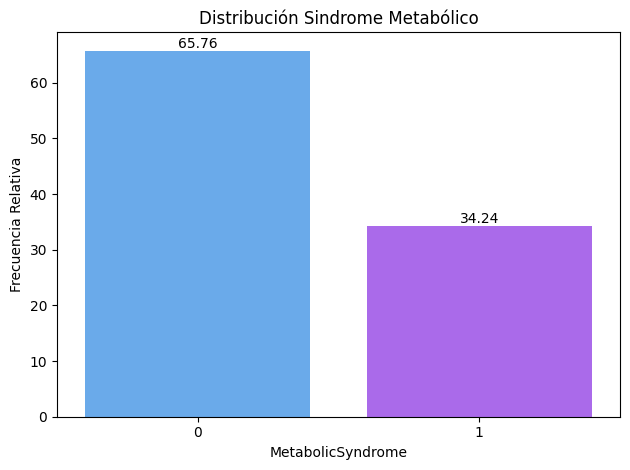

In [16]:
barplot_categorica(df, target)

- El target está desbalanceado, hay mayor concentración de pacientes hacía la clase 0 es decir los pacientes sanos, tendré que tener éste factor en cuenta a la hora de realizar el modelo porque lo que nos interesa conseguir es la mayor precisión en el grupo 1.

In [17]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1920 entries, 651 to 1230
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1920 non-null   int64  
 1   Sex                1920 non-null   object 
 2   Marital            1746 non-null   object 
 3   Income             1821 non-null   float64
 4   Race               1920 non-null   object 
 5   WaistCirc          1858 non-null   float64
 6   BMI                1902 non-null   float64
 7   Albuminuria        1920 non-null   int64  
 8   UricAcid           1920 non-null   float64
 9   BloodGlucose       1920 non-null   int64  
 10  HDL                1920 non-null   int64  
 11  Triglycerides      1920 non-null   int64  
 12  MetabolicSyndrome  1920 non-null   int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 210.0+ KB


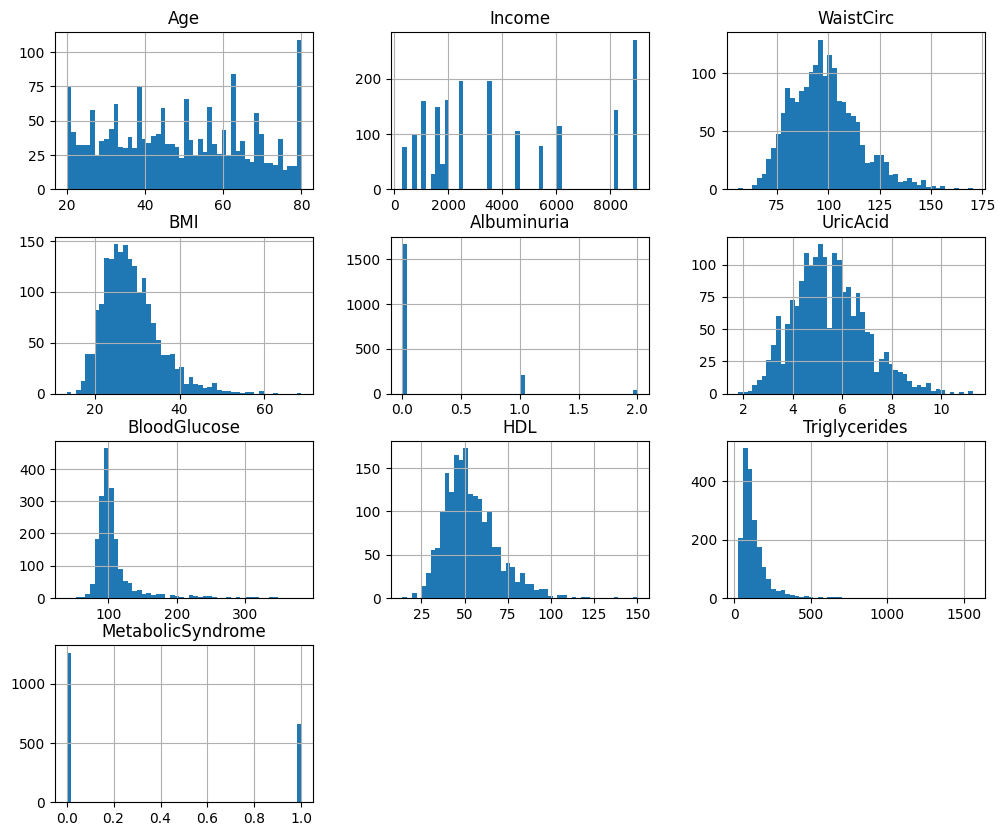

In [18]:
train_set.hist(bins=50, figsize=(12, 10))
plt.show()

- Voy a empezar por imputar nulos a las columnas:

    - Marital: Moda
    - Income: Media
    - WaistCirc: Media
    - BMI:Media                   

In [19]:
waist_circ_media = train_set["WaistCirc"].mean()
bmi_media = train_set["BMI"].mean()
income_media = train_set["Income"].mean()
marital_moda = train_set["Marital"].mode()[0]
train_set["WaistCirc"].fillna(waist_circ_media, inplace=True)
train_set["BMI"].fillna(waist_circ_media, inplace=True)
train_set["Income"].fillna(income_media, inplace = True)
train_set["Marital"].fillna(marital_moda, inplace = True)

- Hago lo mismo al test

In [20]:
test_set["WaistCirc"].fillna(waist_circ_media, inplace=True)
test_set["BMI"].fillna(waist_circ_media, inplace=True)
test_set["Income"].fillna(income_media, inplace = True)
test_set["Race"].fillna(marital_moda, inplace = True)

- Como ya he realizado el EDA anteriormente, sé que hay features que tiene muchos outliers por lo que voy a categorizarlas para poder tratar esos valores atípicos y mejorar la compresión de los datos, seguimos los valores médicos estándar para hacer las categorizaciones.

- Enlace del EDA: https://github.com/nessapatino/EDA_METABOLICSYNDROME

In [21]:
ou= ["BMI","WaistCirc","BloodGlucose","HDL","Triglycerides"]

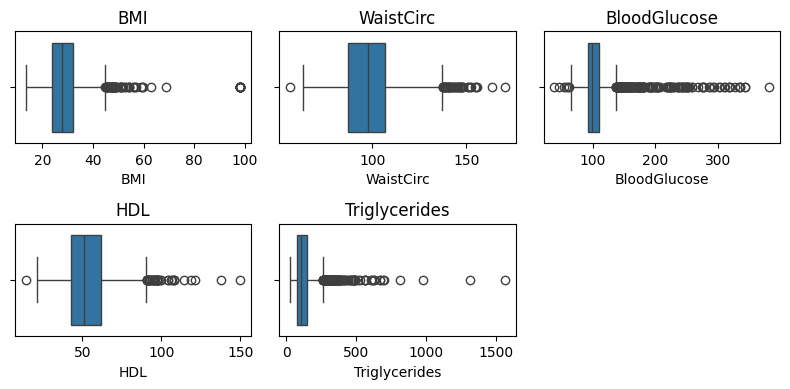

In [22]:
plt.figure(figsize=(8,4))  # Ajusta el tamaño de la figura

for i, columna in enumerate(ou, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=train_set[columna])
    plt.title(columna)

# Ajustar el diseño
plt.tight_layout()

# Mostrar los boxplots
plt.show()

In [23]:
#Categorizar BMI
bins = [-np.inf, 18.5, 24.9, 29.9, np.inf]
labels = ['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad']
train_set['categoria_bmi'] = pd.cut(train_set["BMI"], bins=bins, labels=labels)
print(train_set['categoria_bmi'].value_counts())

categoria_bmi
Obesidad     700
Sobrepeso    610
Normal       575
Bajo peso     35
Name: count, dtype: int64


In [24]:
#Categorizar BloodGlucose
bins = [-np.inf, 99, 126, np.inf]
labels = ['Normal', 'Prediabetes', 'Diabetes']
train_set['categoria_bloodglucose'] = pd.cut(train_set["BloodGlucose"], bins=bins, labels=labels)
print(train_set['categoria_bloodglucose'].value_counts())

categoria_bloodglucose
Normal         961
Prediabetes    720
Diabetes       239
Name: count, dtype: int64


In [25]:
#Categorizar trigliceridos
def categorizar_trigliceridos(edad, trigliceridos):

    if edad >= 10 and edad <= 19:  # Niños y adolescentes
        if trigliceridos < 90:
            return 'Nivel normal'
        elif 90 <= trigliceridos < 150:
            return 'Niveles ligeramente altos'
        elif 150 <= trigliceridos:
            return 'Niveles altos'
    else:  # Adultos
        if trigliceridos < 150:
            return 'Nivel normal'
        elif 150 <= trigliceridos < 200:
            return 'Niveles ligeramente altos'
        elif 200 <= trigliceridos < 500:
            return 'Niveles altos'
        else:
            return 'Niveles muy altos'
        
train_set['categoria_trigliceridos'] = train_set.apply(lambda x: categorizar_trigliceridos(x["Age"], x["Triglycerides"]), axis=1)

In [26]:
print(train_set['categoria_trigliceridos'].value_counts())


categoria_trigliceridos
Nivel normal                 1441
Niveles ligeramente altos     242
Niveles altos                 219
Niveles muy altos              18
Name: count, dtype: int64


In [27]:
def categorizar_hdl(genero, hdl):
    if genero == 'Male':
        if hdl < 40:
            return 'Valor_Bajo'
        else:
            return 'Normal'
    elif genero == 'Female':
        if hdl < 50:
            return 'Valor_Bajo'
        elif hdl >= 50:
            return 'Normal'


In [28]:
train_set['categoria_hdl'] = train_set.apply(lambda x: categorizar_hdl(x["Sex"], x["HDL"]), axis=1)


In [29]:
print(train_set['categoria_hdl'].value_counts())


categoria_hdl
Normal        1403
Valor_Bajo     517
Name: count, dtype: int64


In [30]:
def categorizar_circunferencia_abdominal(genero, circunferencia):
    if genero == 'Female':
        if circunferencia > 88:
            return 'Riesgo Elevado'
        else:
            return 'Normal'
    elif genero == 'Male':
        if circunferencia > 102:
            return 'Riesgo Elevado'
        else:
            return 'Normal'


In [31]:
train_set['categoria_circunferencia'] = train_set.apply(lambda x: categorizar_circunferencia_abdominal(x["Sex"], x["WaistCirc"]), axis=1)


In [32]:
print(train_set['categoria_circunferencia'].value_counts())


categoria_circunferencia
Riesgo Elevado    1028
Normal             892
Name: count, dtype: int64


In [33]:
train_set

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,categoria_bmi,categoria_bloodglucose,categoria_trigliceridos,categoria_hdl,categoria_circunferencia
651,38,Male,Single,800.0,Black,142.0,48.0,1,7.1,116,59,91,1,Obesidad,Prediabetes,Nivel normal,Normal,Riesgo Elevado
1111,30,Male,Married,9000.0,Asian,95.1,28.1,0,5.5,103,41,428,1,Sobrepeso,Prediabetes,Niveles altos,Normal,Normal
392,41,Male,Married,6200.0,Black,92.1,27.0,0,6.4,94,37,26,0,Sobrepeso,Normal,Nivel normal,Valor_Bajo,Normal
1877,54,Male,Married,3500.0,Hispanic,102.7,29.6,0,6.4,104,37,291,1,Sobrepeso,Prediabetes,Niveles altos,Valor_Bajo,Riesgo Elevado
962,76,Male,Married,2000.0,Asian,84.7,21.2,1,9.6,138,56,157,1,Normal,Diabetes,Niveles ligeramente altos,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,21,Female,Married,3500.0,Hispanic,82.7,22.0,0,4.3,89,48,65,0,Normal,Normal,Nivel normal,Valor_Bajo,Normal
2197,26,Female,Single,2000.0,Asian,138.2,44.5,0,7.3,107,47,112,1,Obesidad,Prediabetes,Nivel normal,Valor_Bajo,Riesgo Elevado
1242,51,Female,Separated,1700.0,MexAmerican,80.4,21.9,0,3.7,91,59,53,0,Normal,Normal,Nivel normal,Normal,Normal
1083,47,Male,Divorced,2500.0,White,106.6,28.8,0,6.1,93,36,154,1,Sobrepeso,Normal,Niveles ligeramente altos,Valor_Bajo,Riesgo Elevado


In [34]:
train_set.drop(columns=["WaistCirc","BMI","BloodGlucose","HDL","Triglycerides"], inplace=True)

In [35]:
train_set

,Age,Sex,Marital,Income,Race,Albuminuria,UricAcid,MetabolicSyndrome,categoria_bmi,categoria_bloodglucose,categoria_trigliceridos,categoria_hdl,categoria_circunferencia
651,38,Male,Single,800.0,Black,1,7.1,1,Obesidad,Prediabetes,Nivel normal,Normal,Riesgo Elevado
1111,30,Male,Married,9000.0,Asian,0,5.5,1,Sobrepeso,Prediabetes,Niveles altos,Normal,Normal
392,41,Male,Married,6200.0,Black,0,6.4,0,Sobrepeso,Normal,Nivel normal,Valor_Bajo,Normal
1877,54,Male,Married,3500.0,Hispanic,0,6.4,1,Sobrepeso,Prediabetes,Niveles altos,Valor_Bajo,Riesgo Elevado
962,76,Male,Married,2000.0,Asian,1,9.6,1,Normal,Diabetes,Niveles ligeramente altos,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,21,Female,Married,3500.0,Hispanic,0,4.3,0,Normal,Normal,Nivel normal,Valor_Bajo,Normal
2197,26,Female,Single,2000.0,Asian,0,7.3,1,Obesidad,Prediabetes,Nivel normal,Valor_Bajo,Riesgo Elevado
1242,51,Female,Separated,1700.0,MexAmerican,0,3.7,0,Normal,Normal,Nivel normal,Normal,Normal
1083,47,Male,Divorced,2500.0,White,0,6.1,1,Sobrepeso,Normal,Niveles ligeramente altos,Valor_Bajo,Riesgo Elevado


- Hago lo mismo con el test

In [36]:
#Categorizar BMI
bins = [-np.inf, 18.5, 24.9, 29.9, np.inf]
labels = ['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad']
test_set['categoria_bmi'] = pd.cut(test_set["BMI"], bins=bins, labels=labels)

In [37]:
#Categorizar BloodGlucose
bins = [-np.inf, 99, 126, np.inf]
labels = ['Normal', 'Prediabetes', 'Diabetes']
test_set['categoria_bloodglucose'] = pd.cut(test_set["BloodGlucose"], bins=bins, labels=labels)


In [38]:
#Categorizar Trigliceridos
test_set['categoria_trigliceridos'] = test_set.apply(lambda x: categorizar_trigliceridos(x["Age"], x["Triglycerides"]), axis=1)

In [39]:
#Categorizar HDL
test_set['categoria_hdl'] = test_set.apply(lambda x: categorizar_hdl(x["Sex"], x["HDL"]), axis=1)

In [40]:
#Categorizar Circunferencia abdominal
test_set['categoria_circunferencia'] = test_set.apply(lambda x: categorizar_circunferencia_abdominal(x["Sex"], x["WaistCirc"]), axis=1)

In [41]:
test_set.drop(columns=["WaistCirc","BMI","BloodGlucose","HDL","Triglycerides"], inplace=True)

## Procesado de Features

---------

#### Tratamiento de las features categóricas

In [42]:
train_set = pd.get_dummies(train_set, columns=["Sex", "Marital", "Race","categoria_bloodglucose","categoria_bmi","categoria_trigliceridos","categoria_hdl","categoria_circunferencia"], dtype = int)


In [43]:
pd.set_option('display.max_columns', 500)
train_set

,Age,Income,Albuminuria,UricAcid,MetabolicSyndrome,Sex_Female,Sex_Male,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Single,Marital_Widowed,Race_Asian,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White,categoria_bloodglucose_Normal,categoria_bloodglucose_Prediabetes,categoria_bloodglucose_Diabetes,categoria_bmi_Bajo peso,categoria_bmi_Normal,categoria_bmi_Sobrepeso,categoria_bmi_Obesidad,categoria_trigliceridos_Nivel normal,categoria_trigliceridos_Niveles altos,categoria_trigliceridos_Niveles ligeramente altos,categoria_trigliceridos_Niveles muy altos,categoria_hdl_Normal,categoria_hdl_Valor_Bajo,categoria_circunferencia_Normal,categoria_circunferencia_Riesgo Elevado
651,38,800.0,1,7.1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1
1111,30,9000.0,0,5.5,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
392,41,6200.0,0,6.4,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0
1877,54,3500.0,0,6.4,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1
962,76,2000.0,1,9.6,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,21,3500.0,0,4.3,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0
2197,26,2000.0,0,7.3,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1
1242,51,1700.0,0,3.7,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
1083,47,2500.0,0,6.1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1


In [44]:
test_set = pd.get_dummies(test_set, columns=["Sex", "Marital", "Race","categoria_bloodglucose","categoria_bmi","categoria_trigliceridos","categoria_hdl","categoria_circunferencia"], dtype = int)

#### Tratamiento de features numéricas

In [45]:
features_num = ['Age','Income','UricAcid','Albuminuria']

In [46]:
train_set_pt = train_set.copy()
test_set_pt = test_set.copy()

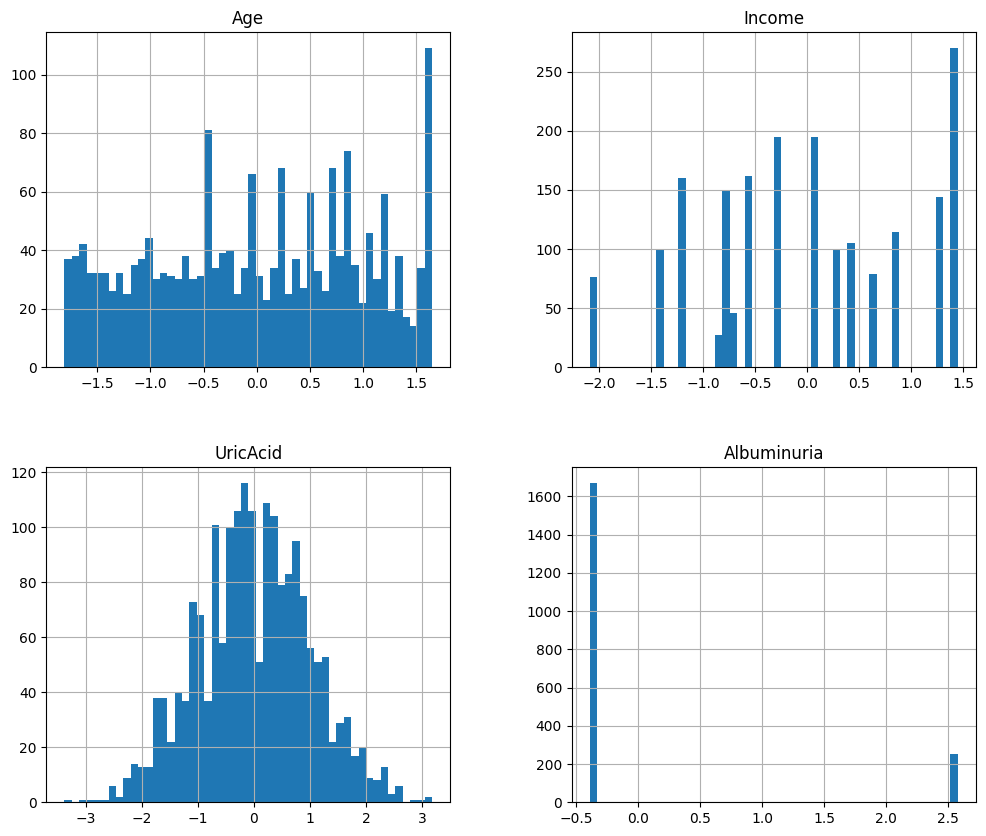

In [47]:
pt = PowerTransformer()
train_set_pt[features_num] = pt.fit_transform(train_set_pt[features_num])
test_set_pt = test_set.copy()
test_set_pt[features_num] = pt.transform(test_set_pt[features_num]) 
train_set_pt[features_num].hist(bins=50, figsize=(12, 10))
plt.show()

#### Separamos en X,y 

In [48]:
X_train_pt= train_set_pt.drop(columns=target)
y_train_pt = train_set_pt[target]
X_test_pt= test_set_pt.drop(columns=target)
y_test_pt = test_set_pt[target]

## Modelado

-----------------------

In [49]:
model_names = ["Logistic Regression","Arbol de Decision","Random Forest","XGBoost","LightGBM","Catboost", "SVC", "KNN"]
rf_clf = RandomForestClassifier(random_state= 42, class_weight= "balanced")
xgb_clf = XGBClassifier(verbosity= 0, random_state = 42, scale_pos_weight=70/30)
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100, class_weight= 'balanced')
lg_clf = LogisticRegression(max_iter = 10000, class_weight= 'balanced')
cat_clf = CatBoostClassifier(random_state= 42, verbose= False, auto_class_weights='Balanced')
tree_clf = DecisionTreeClassifier(random_state= 42, class_weight= "balanced")
svc = SVC(random_state= 42, class_weight='balanced')
knn_clf = KNeighborsClassifier(n_neighbors= 4)

model_set = [rf_clf, xgb_clf, lgb_clf,lg_clf,cat_clf,tree_clf,svc, knn_clf]




In [50]:
#Hacemos un CrossValidation con varios modelos y las features escaladas con PowerTransformer
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    metricas_cv[nombre] = cross_val_score(modelo, X_train_pt, y_train_pt, cv = 5, scoring = "recall")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

RandomForestClassifier(class_weight='balanced', random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
LGBMClassifier(class_weight='balanced', random_state=42, verbose=-100)
LogisticRegression(class_weight='balanced', max_iter=10000)
DecisionTreeClassifier(class_weight='balanced', 

In [51]:
data= []
for model_name, valores in metricas_cv.items():
    data.append({'Modelo': model_name, 'Recall_CV': np.mean(valores)})
df = pd.DataFrame(data)
print(df)
print(f"El ganador es {ganador}")

                Modelo  Recall_CV
0  Logistic Regression   0.815857
1    Arbol de Decision   0.847745
2        Random Forest   0.847756
3              XGBoost   0.931448
4             LightGBM   0.891869
5             Catboost   0.780824
6                  SVC   0.940585
7                  KNN   0.596692
El ganador es SVC


In [52]:
rf_clf = RandomForestClassifier(random_state= 42, class_weight= "balanced")
rf_clf.fit(X_train_pt, y_train_pt)

feature_names = X_train_pt.columns
importances = rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
17,categoria_bloodglucose_Normal,0.155319
24,categoria_trigliceridos_Nivel normal,0.095095
0,Age,0.076986
30,categoria_circunferencia_Normal,0.075317
31,categoria_circunferencia_Riesgo Elevado,0.072121
3,UricAcid,0.066424
28,categoria_hdl_Normal,0.063432
1,Income,0.050306
29,categoria_hdl_Valor_Bajo,0.049596
18,categoria_bloodglucose_Prediabetes,0.040676


#### Optimización de Hiperparámetros

- Voy a hacer un GridSearch de los modelos para mejorar los resultados.

In [53]:
metricas_optimizadas = {}

In [54]:
rf_clf = RandomForestClassifier(random_state= 42)
param_grid_rf = {"n_estimators": [50,100,200],
    "max_depth": [None,20,30],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1,5,10],
    "max_features": ["sqrt","log2",None],
    "class_weight": ["balanced", None],
}

rf_grid = GridSearchCV(rf_clf,
                       param_grid= param_grid_rf,
                       cv = 5,
                       scoring = "recall")

rf_grid.fit(X_train_pt, y_train_pt)
print("Random_forest_score:", rf_grid.best_score_)
metricas_optimizadas["Random_Forest"] = rf_grid.best_score_

Random_forest_score: 0.9436039787184825


In [55]:
xgb_clf = XGBClassifier(verbosity= 0, random_state = 42, scale_pos_weight=70/30)
param_grid_xgb= {'n_estimators': [50, 100, 200],
       'learning_rate': [0.01, 0.05, 0.1],
       'max_depth': [3, 5, 7],
       'subsample': [0.6, 0.8, 1.0],
       'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_grid = GridSearchCV(xgb_clf, 
                        cv = 5,
                        param_grid= param_grid_xgb, 
                        scoring = "recall")


xgb_grid.fit(X_train_pt, y_train_pt)
print("XGB_score:", xgb_grid.best_score_)
metricas_optimizadas["XGBoost"] = xgb_grid.best_score_

XGB_score: 0.9771339347675225


In [56]:
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100)
param_grid_lgb= {"max_depth": [-1,5,10],
                 "num_leaves": [31, 50],
                "learning_rate": [0.1, 0.01],
                "n_estimators": [100, 200],
                "class_weight": ["balanced", None], 
                "min_child_samples": [20, 30],
                "subsample": [0.8, 1.0],
                "colsample_bytree": [0.8, 1.0]
}

lgb_grid = GridSearchCV(lgb_clf, 
                        cv = 5,
                        param_grid= param_grid_lgb, 
                        scoring = "recall")


lgb_grid.fit(X_train_pt, y_train_pt)
print("LGB_score:", lgb_grid.best_score_)
metricas_optimizadas["LightGBM"] = lgb_grid.best_score_

LGB_score: 0.9406199398565812


In [57]:
tree_clf = DecisionTreeClassifier(random_state= 42)
param_grid_tree = {"criterion": ["gini","entropy"],
                   "splitter": ["best", "random"],
                   "max_depth": [None,20,30,40],
                   "min_samples_split":[2,10,20],
                   "min_samples_leaf":[1,5,10],
                   "max_features": ["sqrt","log2",None],
                   "class_weight": ["balanced", None]
}

tree_grid = GridSearchCV(tree_clf,
                       param_grid= param_grid_tree,
                       cv = 5,
                       scoring = "recall")

tree_grid.fit(X_train_pt, y_train_pt)
print("Arbol_Descición_score:", tree_grid.best_score_)
metricas_optimizadas["Arbol_Descición"] = tree_grid.best_score_

Arbol_Descición_score: 0.9191996298866527


In [58]:
lg_clf = LogisticRegression(random_state=42)
param_grid_lg= {"C":[0.01, 0.1, 1, 10],
                "max_iter":[1000,2000,5000],
                "class_weight":["balanced",None]
}

lg_grid = GridSearchCV(lg_clf,
                       param_grid= param_grid_lg,
                       cv = 5,
                       scoring = "recall")

lg_grid.fit(X_train_pt, y_train_pt)
print("Regresión_Logística_score:", lg_grid.best_score_)
metricas_optimizadas["Regresión_Logística"] = lg_grid.best_score_

Regresión_Logística_score: 0.9375665047420773


In [59]:
knn_clf = KNeighborsClassifier()
param_grid_knn= {"n_neighbors":[3,4,5],
                 "weights":['uniform', 'distance'],
                 "metric":["manhattan","euclidean","chebyshev"]
}

knn_grid = GridSearchCV(knn_clf,
                       param_grid= param_grid_knn,
                       cv = 5,
                       scoring = "recall")

knn_grid.fit(X_train_pt, y_train_pt)
print("KNN_score:", knn_grid.best_score_)
metricas_optimizadas["KNN"] = knn_grid.best_score_

KNN_score: 0.7762202174415914


In [60]:
cat_clf = CatBoostClassifier(random_state= 42, verbose= False)
param_grid_cat= {"iterations": [100, 300], 
    "learning_rate": [0.01, 0.05, 0.1],  
    "depth": [4, 6, 8],  
    "l2_leaf_reg": [1, 3, 5],  
    "bagging_temperature": [0, 1, 10],
    "auto_class_weights": ["Balanced"]
}

cat_grid = GridSearchCV(cat_clf,
                       param_grid= param_grid_cat,
                       cv = 5,
                       scoring = "recall")

cat_grid.fit(X_train_pt, y_train_pt)
print("CatBoost_score:", cat_grid.best_score_)
metricas_optimizadas["CatBoost"] = cat_grid.best_score_

CatBoost_score: 0.9436849410131852


In [61]:
svc = SVC(random_state= 42)
param_grid_svc= {"C":[0.01, 0.1, 1, 10, 100],
                 "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
                 "gamma":['scale', 'auto'],
                 "class_weight":["balanced",None]
}

svc_grid = GridSearchCV(svc,
                       param_grid= param_grid_svc,
                       cv = 5,
                       scoring = "recall")

svc_grid.fit(X_train_pt, y_train_pt)
print("SVC_score:", svc_grid.best_score_)
metricas_optimizadas["SVC"] = svc_grid.best_score_

SVC_score: 0.9619592875318066


In [62]:
metricas_optimizadas

{'Random_Forest': 0.9436039787184825,
 'XGBoost': 0.9771339347675225,
 'LightGBM': 0.9406199398565812,
 'Arbol_Descición': 0.9191996298866527,
 'Regresión_Logística': 0.9375665047420773,
 'KNN': 0.7762202174415914,
 'CatBoost': 0.9436849410131852,
 'SVC': 0.9619592875318066}

In [63]:
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

{'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.6}
0.9771339347675225


In [64]:
# Guardamos el mejor modelo en un archivo
dump(xgb_grid, 'modelo_entrenado_xgb_grid.joblib')

['modelo_entrenado_xgb_grid.joblib']

## Evaluación contra Test

------

In [65]:
y_pred = xgb_grid.best_estimator_.predict(X_test_pt)
print(classification_report(y_test_pt, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86       316
           1       0.69      0.96      0.80       165

    accuracy                           0.84       481
   macro avg       0.83      0.87      0.83       481
weighted avg       0.88      0.84      0.84       481



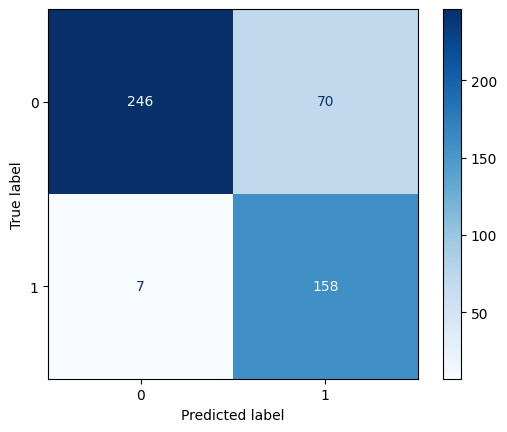

In [66]:
ConfusionMatrixDisplay.from_predictions(y_test_pt, y_pred,cmap="Blues")

AUC-ROC: 0.9519658611430762


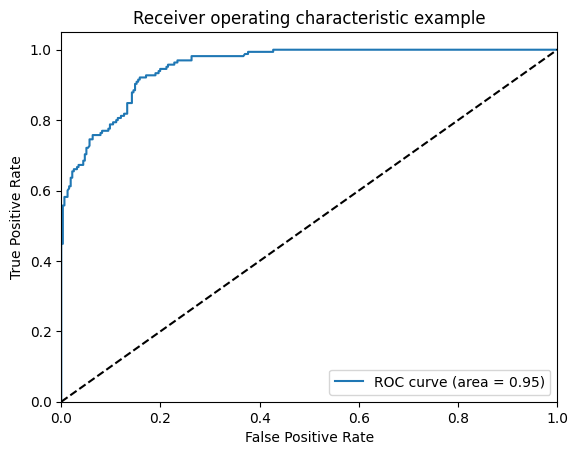

In [67]:
probabilidades = xgb_grid.predict_proba(X_test_pt)[:, 1]

fpr, tpr, _ = roc_curve(y_test_pt, probabilidades)
roc_auc = auc(fpr, tpr)

print("AUC-ROC:", roc_auc)

# Visualización de la Curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


## Conclusiones

-------

- Alta precisión para la clase 0 (Pacientes Sanos): El modelo tiene una precisión de 0.97 para predecir la clase 0. Esto significa que es muy efectivo en identificar a los pacientes sanos, con muy pocos falsos positivos.

- Recall destacado para la clase 1 (Pacientes Enfermos): El recall para la clase 1 es 0.96, indicando que el modelo es altamente sensible y capaz de identificar a la mayoría de los pacientes con síndrome metabólico.

- F1-Score Balanceado: Los valores de F1-Score, que combinan precisión y recall, son bastante altos para ambas clases (0.86 y 0.80, respectivamente), lo que sugiere un balance entre precisión y capacidad de recuperación de la información.

- Soporte: El soporte indica el número de ocurrencias de cada clase verdadera en el conjunto de datos; hay más pacientes sanos (316) que enfermos (165). Esto podría indicar que el modelo está potencialmente más sesgado hacia la clase 0, y puede ser una consideración para un reequilibrio de clases o técnicas de ponderación en entrenamientos futuros.

- Desempeño General del Modelo: La precisión global (accuracy) del modelo es 0.84, lo que señala una alta efectividad general del modelo.

- Comparación con Otros Modelos: Aunque inicialmente el modelo SVC tuvo el mejor rendimiento, después de la optimización de hiperparámetros, el modelo XGBoost superó al SVC, especialmente en términos de recall para la clase 1, que es crítica en un contexto médico donde la detección de pacientes enfermos es prioritaria.

- Importancia del Recall en la Clase 1: Dado que es vital no pasar por alto a los pacientes con síndrome metabólico, un recall alto en la clase 1 es más valioso que una alta precisión. Esto justifica la elección de XGBoost como el mejor modelo después de la optimización de hiperparámetros.


En resumen, el modelo XGBoost optimizado demostró ser altamente eficaz para identificar pacientes con síndrome metabólico, con un desempeño general robusto y un balance adecuado entre las métricas evaluadas. Esto es prometedor para su uso en la detección del síndrome metabólico en entornos clínicos.

